In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import scipy.stats
from sklearn.metrics import explained_variance_score


In [29]:
two4_diff_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["e_kern"]
two4_diff_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["i_kern"]
two4_diff_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["nonlin_in"]

two4_na_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["e_kern"]
two4_na_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["i_kern"]
two4_na_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["nonlin_in"]

one4_na_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["e_kern"]
one4_na_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["i_kern"]
one4_na_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["nonlin_in"]

<ipython-input-35-27ce4560bd06>:248: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


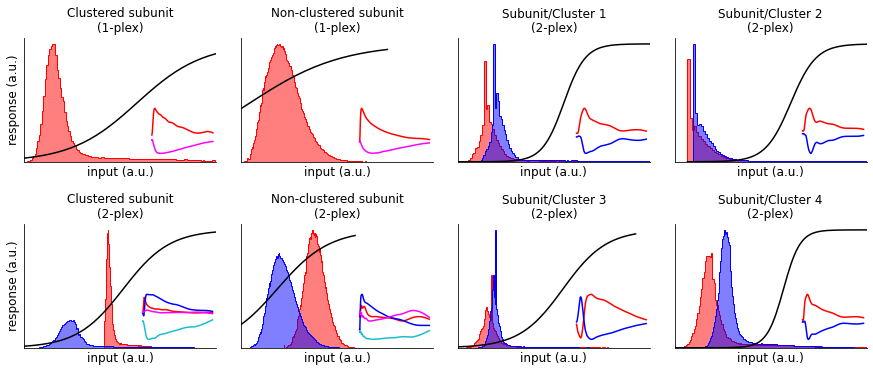

In [35]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

bin_no = 250

fig = plt.figure(constrained_layout=True, figsize = (12,5))
gs = fig.add_gridspec(2,4, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[0,2])
ax6 = fig.add_subplot(gs[0,3])
ax7 = fig.add_subplot(gs[1,2])
ax8 = fig.add_subplot(gs[1,3])

# Subunit 1 #
y1, x1, _ = ax1.hist(one4_na_nonlin[:,9,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))

min_x = np.min(x1)
max_x = np.max(x1)
max_y = np.max(y1)
x = np.arange(min_x, max_x, 0.1)
ax1.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_xlim(min_x, 1.2)
ax1.set_ylabel("response (a.u.)", fontsize=12)
ax1.set_xlabel("input (a.u.)", fontsize=12)
ax1.set_title("Clustered subunit\n(1-plex)", fontsize=12)

ins = ax1.inset_axes([0.65,0.05,0.35,0.4])
ins.plot(one4_na_ekern[9,0,:], color="red")
ins.plot(one4_na_ikern[9,0,:], color="fuchsia")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])
#ax1.set_ylim(0,3)

# Subunit 2 #
y1, x1, _ = ax2.hist(one4_na_nonlin[:,1,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))

min_x = np.min(x1)
max_x = np.max(x1)
max_y = np.max(y1)
x = np.arange(min_x, max_x, 0.1)
ax2.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_xlim(min_x, 2)
ax2.set_xlabel("input (a.u.)", fontsize=12)
ax2.set_title("Non-clustered subunit\n(1-plex)", fontsize=12)

ins = ax2.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(one4_na_ekern[1,0,:], color="red")
ins.plot(one4_na_ikern[1,0,:], color="fuchsia")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])
#ax2.set_ylim(0,3)

# Subunit 3 #
y1, x1, _ = ax3.hist(two4_na_nonlin[:,9,1,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax3.hist(two4_na_nonlin[:,9,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax3.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_xlim(min_x, 2)
ax3.set_xlabel("input (a.u.)", fontsize=12)
ax3.set_ylabel("response (a.u.)", fontsize=12)
ax3.set_title("Clustered subunit\n(2-plex)", fontsize=12)
#ax3.set_ylim(0,10)

ins = ax3.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_na_ekern[9,1,:], color="red")
ins.plot(two4_na_ekern[9,0,:], color="blue")
ins.plot(two4_na_ikern[9,1,:], color="fuchsia")
ins.plot(two4_na_ikern[9,0,:], color="tab:cyan")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 4 #
y1, x1, _ = ax4.hist(two4_na_nonlin[:,1,1,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax4.hist(two4_na_nonlin[:,1,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax4.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.set_yticks([])
ax4.set_xticks([])
ax4.set_xlim(min_x, 3)
ax4.set_xlabel("input (a.u.)", fontsize=12)
ax4.set_title("Non-clustered subunit\n(2-plex)", fontsize=12)
#ax4.set_ylim(0,3)

ins = ax4.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_na_ekern[1,1,:], color="red")
ins.plot(two4_na_ekern[1,0,:], color="blue")
ins.plot(two4_na_ikern[1,1,:], color="fuchsia")
ins.plot(two4_na_ikern[1,0,:], color="tab:cyan")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 1 #
y1, x1, _ = ax5.hist(two4_diff_nonlin[:,6,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax5.hist(two4_diff_nonlin[:,6,1,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax5.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax5.spines.right.set_visible(False)
ax5.spines.top.set_visible(False)
ax5.set_yticks([])
ax5.set_xticks([])
ax5.set_xlim(min_x, 4)
ax5.set_xlabel("input (a.u.)", fontsize=12)
#ax5.set_ylabel("response (a.u.)")
ax5.set_title("Subunit/Cluster 1\n(2-plex)", fontsize=12)
#ax5.set_ylim(0,2)

ins = ax5.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_diff_ekern[6,0,:], color="red")
ins.plot(two4_diff_ekern[6,1,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 2 #
y1, x1, _ = ax6.hist(two4_diff_nonlin[:,7,1,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax6.hist(two4_diff_nonlin[:,7,0,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax6.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax6.spines.right.set_visible(False)
ax6.spines.top.set_visible(False)
ax6.set_yticks([])
ax6.set_xticks([])
ax6.set_xlim(min_x-0.5, 3)
ax6.set_xlabel("input (a.u.)", fontsize=12)
ax6.set_title("Subunit/Cluster 2\n(2-plex)", fontsize=12)
#ax6.set_ylim(0,3)

ins = ax6.inset_axes([0.65,0.05,0.35,0.4])
ins.plot(two4_diff_ekern[7,1,:], color="red")
ins.plot(two4_diff_ekern[7,0,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 3 #
y1, x1, _ = ax7.hist(two4_diff_nonlin[:,8,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax7.hist(two4_diff_nonlin[:,8,1,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax7.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax7.spines.right.set_visible(False)
ax7.spines.top.set_visible(False)
ax7.set_yticks([])
ax7.set_xticks([])
ax7.set_xlim(min_x, 2)
ax7.set_xlabel("input (a.u.)", fontsize=12)
#ax7.set_ylabel("Response (a.u.)")
ax7.set_title("Subunit/Cluster 3\n(2-plex)", fontsize=12)
#ax7.set_ylim(0,7)

ins = ax7.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_diff_ekern[8,0,:], color="red")
ins.plot(two4_diff_ekern[8,1,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 4 #
y1, x1, _ = ax8.hist(two4_diff_nonlin[:,9,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax8.hist(two4_diff_nonlin[:,9,1,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax8.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax8.spines.right.set_visible(False)
ax8.spines.top.set_visible(False)
ax8.set_yticks([])
ax8.set_xticks([])
ax8.set_xlim(min_x, 5)
ax8.set_xlabel("input (a.u.)", fontsize=12)
ax8.set_title("Subunit/Cluster 4\n(2-plex)", fontsize=12)
#ax8.set_ylim(0,1)

ins = ax8.inset_axes([0.65,0.05,0.35,0.4])
ins.plot(two4_diff_ekern[9,0,:], color="red")
ins.plot(two4_diff_ekern[9,1,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig_supp1/fig_supp1_raw.pdf", bbox_inches="tight", transparent=True)